In [2]:
# SQL_CHALLENGE BONUS
# --------------------------------------
# Colby Alexander Hoke
# UNC Data Analytics Bootcamp, August 2020
# --------------------------------------

In [3]:
# Set up
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

# Import SQL specifics
# WARNING: config.py must be provided to connect to database
from config import sql_user
from config import sql_pass
from config import sql_db

In [4]:
# Connect to postgresql database
engine = create_engine(f'postgresql://{sql_user}:{sql_pass}@{sql_db}')
conn = engine.connect()

## Create a histogram to visualize the most common salary ranges for employees.

In [5]:
# Query the database to build dataframe from salaries table
salary_df = pd.read_sql("SELECT * FROM salaries;", conn) 

# Show the dataframe
salary_df

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228
...,...,...
300019,499995,40000
300020,499996,58058
300021,499997,49597
300022,499998,40000


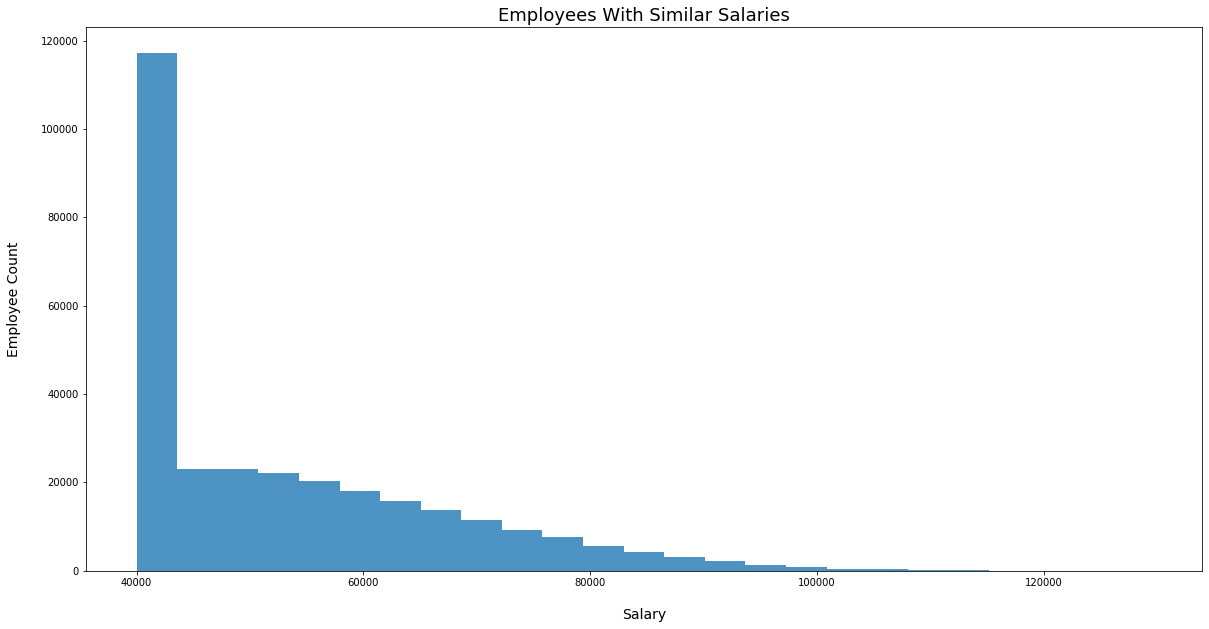

In [6]:
# Build the graph
ax1 = salary_df['salary'].plot(kind='hist', bins=25, alpha=0.8, figsize=(20,10))

# Set title and labels
ax1.set_title("Employees With Similar Salaries", size=18)
ax1.set_xlabel("Salary", labelpad=20, size=14)
ax1.set_ylabel("Employee Count", labelpad=20, size=14)

# Show the graph
plt.show()

### Conclusion:
We have the majority of employees (>100,000) earning about \$40,000.<br>
That's ~1/3 of the workforce all with nearly the same salary, but let's see the average salaries by job title.

## Create a bar chart of average salary by title.


In [7]:
# Query the database
salary_title_avg_query = "SELECT t.title, ROUND(AVG(s.salary),2) as avg_salary FROM salaries s RIGHT JOIN employees e ON (e.emp_no = s.emp_no) RIGHT JOIN titles t ON (t.title_id = e.emp_title_id) GROUP BY title ORDER BY avg_salary DESC;" 
salary_title_avg_df = pd.read_sql(salary_title_avg_query, conn) 

# Diplay the dataframe
salary_title_avg_df


,title,avg_salary
0,Senior Staff,58550.17
1,Staff,58465.38
2,Manager,51531.04
3,Technique Leader,48582.90
4,Assistant Engineer,48564.43
5,Engineer,48535.34
6,Senior Engineer,48506.80


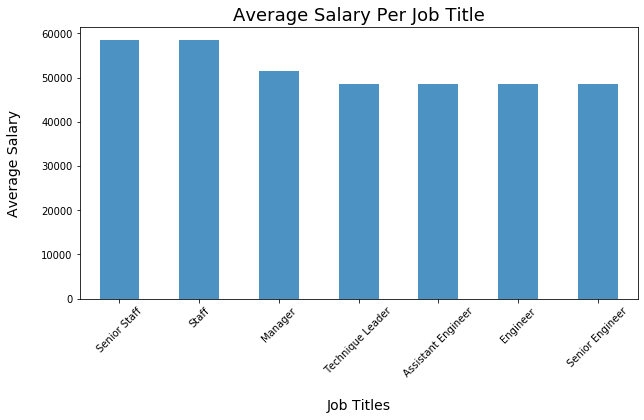

In [8]:
# Build the graph
ax2 = salary_title_avg_df.plot(kind='bar', figsize=(10,5), x='title', rot=45, alpha=0.8, legend=False)

# Set title and labels
ax2.set_title("Average Salary Per Job Title", size=18)
ax2.set_xlabel("Job Titles", labelpad=20, size=14)
ax2.set_ylabel("Average Salary", labelpad=20, size=14)
# Show the graph
plt.show()

### Conclusion:
1/3 of the workers earn about 40,000, but the average salary across all job titles is very close.<br> 
Even titles like Senior Staff or Senior Engineer seem to have people making 40,000, thus bring down the average.<br>
That seems wrong. Wouldn't your Senior Engineers make much more than "regular" Engineers?<br>
Wouldn't your Senior Staff make much more than "regular" Staff?

### Extra bit:
Since my employee number is 499942, I wonder what information they have about "me."


In [9]:
# Query the database
me_query = "SELECT * FROM employees WHERE emp_no = 499942;" 
me_df = pd.read_sql(me_query, conn) 

# Diplay the dataframe
me_df

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date
0,499942,e0004,1963-01-10,April,Foolsday,F,1997-02-10


### Very funny.